In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [10]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [15]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [16]:
x=df.iloc[:,1:4]
y=df.iloc[:,-1].values
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [17]:
z=x.iloc[:,1:3].values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(z)
z=sc.transform(z)
z=pd.DataFrame(z)
z=z.rename(columns={0:'Age',1:'EstimatedSalary'})
z
g=x.iloc[:,0]
g=pd.DataFrame(g)

In [18]:
input1=pd.concat([g,z],axis=1)
input1

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751
...,...,...,...
395,0,0.797057,-0.844019
396,1,1.274623,-1.372587
397,0,1.179110,-1.460681
398,1,-0.158074,-1.078938


In [20]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(input1,y,test_size=.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [21]:
from sklearn.feature_selection import f_regression
p=f_regression(x_train,y_train)[1].round(4)
p

array([0.3593, 0.    , 0.    ])

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
cm=confusion_matrix(y_pred,y_train)
accuracy=accuracy_score(y_pred,y_train)
print(cm)
print(accuracy)

[[181  38]
 [ 18  83]]
0.825


In [24]:
lr.coef_

array([[0.09869526, 2.0265874 , 1.06229835]])

In [25]:
lr.intercept_

array([-1.00827829])

In [27]:
Feature_name=input1.columns.values

In [28]:
Summary_Table=pd.DataFrame(columns=['Feature name'],data=Feature_name)
Summary_Table

,Feature name
0,Gender
1,Age
2,EstimatedSalary


In [29]:
p_value=p
Summary_Table['p_value']=p_value
Summary_Table

,Feature name,p_value
0,Gender,0.3593
1,Age,0.0000
2,EstimatedSalary,0.0000


In [30]:
Summary_Table['Coef']=np.transpose(lr.coef_)
Summary_Table

,Feature name,p_value,Coef
0,Gender,0.3593,0.098695
1,Age,0.0000,2.026587
2,EstimatedSalary,0.0000,1.062298


In [31]:
Summary_Table.index=Summary_Table.index+1
Summary_Table

,Feature name,p_value,Coef
1,Gender,0.3593,0.098695
2,Age,0.0000,2.026587
3,EstimatedSalary,0.0000,1.062298


In [32]:
Summary_Table['odds_ratio']=np.exp(Summary_Table.Coef)
Summary_Table.sort_values('odds_ratio',ascending=False)

,Feature name,p_value,Coef,odds_ratio
2,Age,0.0000,2.026587,7.588147
3,EstimatedSalary,0.0000,1.062298,2.893013
1,Gender,0.3593,0.098695,1.103730


In [33]:
x=df.iloc[:,2:4]
y=df.iloc[:,-1].values
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x=sc.transform(x)

In [35]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [36]:
from sklearn.feature_selection import f_regression
p=f_regression(x_train,y_train)[1].round(4)
p

array([0., 0.])

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred=lr.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [39]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [40]:
df['Predicted Purchased']=y_pred
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Predicted Purchased
0,15624510,1,19,19000,0,0
1,15810944,1,35,20000,0,0
2,15668575,0,26,43000,0,0
3,15603246,0,27,57000,0,0
4,15804002,1,19,76000,0,0
...,...,...,...,...,...,...
395,15691863,0,46,41000,1,0
396,15706071,1,51,23000,1,1
397,15654296,0,50,20000,1,0
398,15755018,1,36,33000,0,0


In [41]:
y_pred1=lr.predict(x_train)

In [42]:
cm1=confusion_matrix(y_pred1,y_train)
accuracy1=accuracy_score(y_pred1,y_train)
print(cm1)
print(accuracy1)

[[180  39]
 [ 19  82]]
0.81875


In [43]:
pred_prob=lr.predict_proba(x)
pred_prob=pred_prob[:,1]
pred_prob=pred_prob.reshape(-1,1)
pred_prob

array([[0.002165  ],
       [0.04666845],
       [0.01734703],
       [0.03203051],
       [0.01261644],
       [0.03300914],
       [0.07118559],
       [0.61029855],
       [0.01055308],
       [0.165609  ],
       [0.0528565 ],
       [0.02282364],
       [0.02071097],
       [0.02514629],
       [0.01253969],
       [0.09051181],
       [0.36644788],
       [0.28863469],
       [0.34366878],
       [0.44269426],
       [0.26377237],
       [0.54960769],
       [0.53570195],
       [0.26377237],
       [0.30948609],
       [0.33114261],
       [0.48287694],
       [0.40324792],
       [0.03052033],
       [0.02082819],
       [0.10828315],
       [0.28497026],
       [0.00289797],
       [0.02608199],
       [0.08455752],
       [0.05737043],
       [0.04094641],
       [0.04398602],
       [0.04169731],
       [0.01452435],
       [0.00944483],
       [0.08030441],
       [0.43058496],
       [0.0157267 ],
       [0.08503711],
       [0.00481704],
       [0.04270483],
       [0.029

In [44]:
df['Predict_prob']=pred_prob
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Predicted Purchased,Predict_prob
0,15624510,1,19,19000,0,0,0.002165
1,15810944,1,35,20000,0,0,0.046668
2,15668575,0,26,43000,0,0,0.017347
3,15603246,0,27,57000,0,0,0.032031
4,15804002,1,19,76000,0,0,0.012616
...,...,...,...,...,...,...,...
395,15691863,0,46,41000,1,0,0.439647
396,15706071,1,51,23000,1,1,0.540310
397,15654296,0,50,20000,1,0,0.468902
398,15755018,1,36,33000,0,0,0.081684


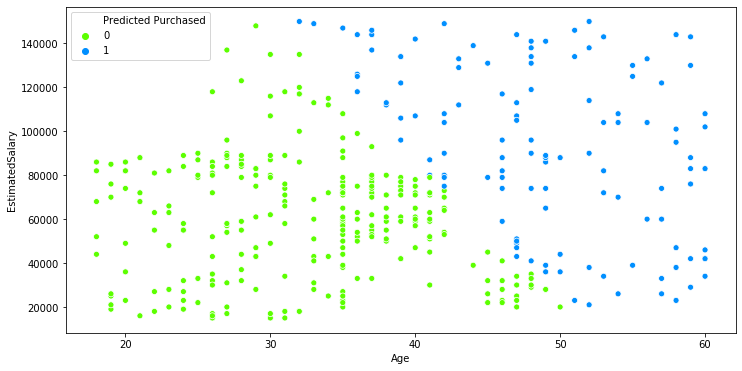

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='EstimatedSalary',x='Age',data=df,hue='Predicted Purchased',palette='gist_rainbow')
plt.legend()
plt.show()